In [42]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos

In [43]:
print(sin(np.pi/4) - np.sqrt(2)/2)

-1.1102230246251565e-16


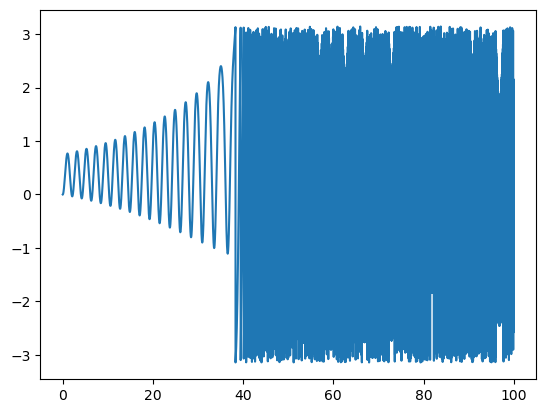

In [53]:

# Implicit / Explicit integration - Error accumulates while simulating(bad method)
mass = 1
g = 9.81
l = 1

theta = 0
theta_dot = 0

torque_input = 3.5

store_theta = []
store_theta_dot = []

iterations = 10000
for i in range(iterations):
    dt = 0.01

    # Intermediate Calculations
    inertia = mass*l*l

    net_torque = torque_input - (mass * g * l * sin(theta))
    
    theta_dot_dot = net_torque / inertia

    # Updating states
    theta += theta_dot * dt

    bool1 = False
    bool2 = False

    theta = (theta + np.pi)%(2*np.pi) - np.pi

    theta_dot += theta_dot_dot * dt

    if theta > 2*np.pi:
        print(theta, bool1, bool2)
    store_theta.append(theta)
    store_theta_dot.append(theta_dot)

plt.plot(np.array(range(iterations))*dt, store_theta)

# Conclusion - Unstable simulation 

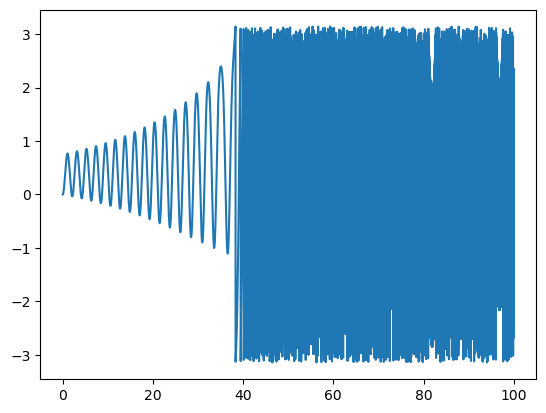

In [57]:

# Implicit / Explicit integration - Error accumulates while simulating(bad method)
mass = 1
g = 9.81
l = 1

theta = 0
theta_dot = 0

prev_theta = theta
prev_theta_dot = theta_dot
prev_theta_dot_dot = 0

torque_input = 3.5

store_theta = []
store_theta_dot = []

iterations = 10000

for i in range(iterations):
    dt = 0.01

    # Intermediate Calculations
    inertia = mass*l*l

    net_torque = torque_input - (mass * g * l * sin(theta))
    
    prev_theta_dot_dot = theta_dot_dot
    theta_dot_dot = net_torque / inertia

    # Updating states
    prev_theta_dot = theta_dot
    theta_dot += theta_dot_dot * dt
    theta_dot = prev_theta_dot + 0.5*(theta_dot_dot + prev_theta_dot_dot)*dt
    
    theta = theta + 0.5 * (theta_dot + prev_theta_dot) * dt

    theta = (theta + np.pi)%(2*np.pi) - np.pi

   
    


    store_theta.append(theta)
    store_theta_dot.append(theta_dot)
    
plt.plot(np.array(range(iterations))*dt, store_theta)
